## Project:  Investigate the TMDB 5000 Movie Dataset 

### Author:
- Rawan Abdullah
- Nouf Haif
- Haya Refai

## Table of Contents
- <ins>Introduction</ins>
- <ins>Data Wrangling</ins>
- <ins>Exploratory Data Analysis</ins>
- <ins>Conclusions</ins>

## Introduction

In our project, we have investigated a dataset containing information about 10,000 movies collected from The Movie Database (TMDb).

I downloaded the TMDB 5000 Movie Dataset which is divided into two parts tmdb_5000_Credits and tmdb_5000_Movies and we saved it as 'Credits.csv', 'Movies.csv'.

In this project, we will analyze a dataset provided by TMDb and investigate its data points to assess the properties that are associated with highly rated movies.

The orginal dataset [ click here ](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

The questions over which the analysis is to be done, are yet to be formed after exploration is done.

Let's import all the necessary libraries to be used ahead

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

## Data Wrangling

In this section of the report, we will load in the data, check its properties, then trim and clean the
dataset for analysis.

#### General Properties

In the following code, we try to explore and assess the dataset to  find the answer for :
1. How many samples in the dataset?
2. How many columns in the dataset?
3. What kind (datatypes) of variables?
4. Is there any missing value?
5. Is there any duplicate rows in the dataset
6. How many number of non-null unique values for features in the dataset?


In [33]:
# Load and read data in Pandas dataframe

df1=pd.read_csv("tmdb_5000_movies.csv")

#show few lines to explor the data
df1.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [34]:
df2 = pd.read_csv('tmdb_5000_credits.csv', usecols=['cast', 'crew'])
df2.head()

,cast,crew
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


we selected only two features, we saw that it is important and useful in the analysis

- It is a data overview that helps to inspect data and enables the user to discover missing, outliers data or human error

The following code answer the question of:

- How many samples in the dataset?
- How many columns in the dataset?

In [35]:
df1.shape #return the dimensions of data

(4803, 20)

There are 4803 records and 20 columns in the first dataset.

In [36]:
df2.shape 

(4803, 2)

There are 4803 records and 2 columns in the secend dataset.

##### - now merge the two dataframes to make a movies_df dataframe.

In [37]:
movie_df = pd.concat([df1, df2], axis=1)
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Now we will create a new dataframe with columns we are interested in.

In [38]:
new_columns = ['id', 'title', 'popularity','release_date', 'vote_average', 'vote_count', 'budget', 'revenue', 'genres',
              'production_companies', 'spoken_languages', 'cast', 'crew', 'status']
movie_df = movie_df[new_columns]
movie_df.head(1)

,id,title,popularity,release_date,vote_average,vote_count,budget,revenue,genres,production_companies,spoken_languages,cast,crew,status
0,19995,Avatar,150.437577,2009-12-10,7.2,11800,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Released


In [39]:
# return the dimensions of new data
movie_df.shape

(4803, 14)

There are 4803 records and 14 columns in the new dataset.

#### Assessing Data


 The following code answer this questions 
1.  What kind (datatypes) of variables?
2. Is there any missing value?
3. Is there any duplicate rows in the dataset
4. How many number of non-null unique values for features in the dataset?


In [40]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
id                      4803 non-null int64
title                   4803 non-null object
popularity              4803 non-null float64
release_date            4802 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
budget                  4803 non-null int64
revenue                 4803 non-null int64
genres                  4803 non-null object
production_companies    4803 non-null object
spoken_languages        4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
status                  4803 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 525.4+ KB


In [41]:
movie_df.isnull().sum() 

id                      0
title                   0
popularity              0
release_date            1
vote_average            0
vote_count              0
budget                  0
revenue                 0
genres                  0
production_companies    0
spoken_languages        0
cast                    0
crew                    0
status                  0
dtype: int64

In [42]:
#check for any duplicates
movie_df.duplicated().sum()

0

No duplicated data.

In [43]:
# returns the datatypes of the columns
movie_df.dtypes

id                        int64
title                    object
popularity              float64
release_date             object
vote_average            float64
vote_count                int64
budget                    int64
revenue                   int64
genres                   object
production_companies     object
spoken_languages         object
cast                     object
crew                     object
status                   object
dtype: object

<b>Problem :<b> 
    

1. release_date variable should be of the form Datetime

In [44]:
movie_df.columns

Index(['id', 'title', 'popularity', 'release_date', 'vote_average',
       'vote_count', 'budget', 'revenue', 'genres', 'production_companies',
       'spoken_languages', 'cast', 'crew', 'status'],
      dtype='object')

We have assessed data and now we can proceed to clean it in the next section.

#### Data Cleaning Process

In this section, we going to solve the problems finds in the dataset from the above observations:

- We will start with cleaning missing data
- We have one cases of missing data in the dataset. 
- First,  'release_date' column , we will remove the row that has the missing value
- Second, we change the data type of the release_date to datetime

In [45]:
#remove rows with null values
movie_df.dropna(inplace = True)
movie_df.isnull().sum()
movie_df.shape

(4802, 14)

In [46]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df.dtypes

id                               int64
title                           object
popularity                     float64
release_date            datetime64[ns]
vote_average                   float64
vote_count                       int64
budget                           int64
revenue                          int64
genres                          object
production_companies            object
spoken_languages                object
cast                            object
crew                            object
status                          object
dtype: object

In [47]:
list(movie_df.isnull().sum().items())

[('id', 0),
 ('title', 0),
 ('popularity', 0),
 ('release_date', 0),
 ('vote_average', 0),
 ('vote_count', 0),
 ('budget', 0),
 ('revenue', 0),
 ('genres', 0),
 ('production_companies', 0),
 ('spoken_languages', 0),
 ('cast', 0),
 ('crew', 0),
 ('status', 0)]

## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

 Look at the variables that you have at present in movie_df

In [48]:
movie_df.head(2)

,id,title,popularity,release_date,vote_average,vote_count,budget,revenue,genres,production_companies,spoken_languages,cast,crew,status
0,19995,Avatar,150.437577,2009-12-10,7.2,11800,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Released
1,285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,6.9,4500,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Released


### 1. Does highly rated movies are associated with revenue

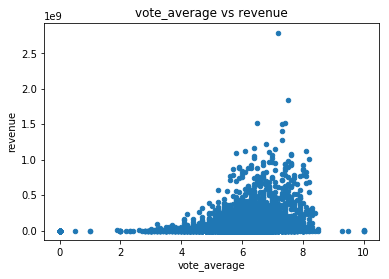

In [49]:
movie_df.plot(x='vote_average',y='revenue',kind='scatter')
plt.title('vote_average vs revenue')
plt.show()

A scatter plot illustrates the answer is "yes" .

### 2. Does highly rated movies are associated with Budget

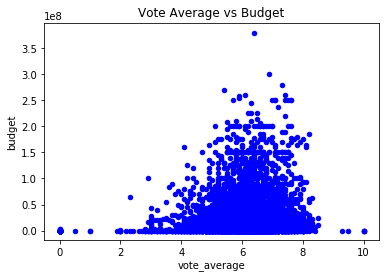

In [50]:
movie_df.plot(x='vote_average',y='budget',kind='scatter', color = 'blue')
plt.title('Vote Average vs Budget')
plt.show()

A scatter plot illustrates the answer is "yes" .

### 3. What is the most votes average movies ?

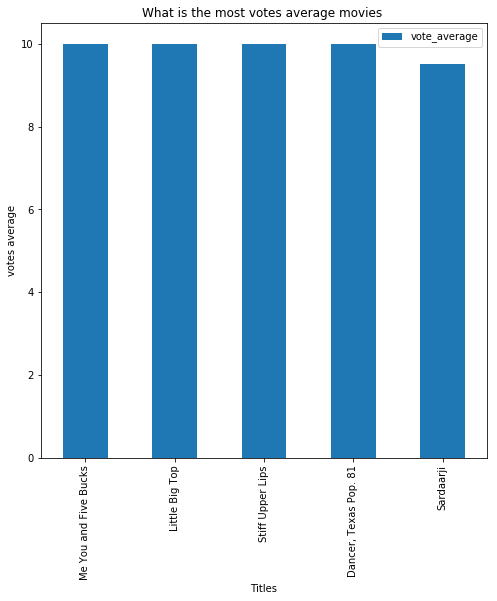

In [51]:
sorted_vote_average = movie_df['vote_average'].sort_values(ascending=False)[:5]

high_vote_average=pd.DataFrame()
titles=[]
vote_average=[]
for i in sorted_vote_average.index:
    titles.append(movie_df.loc[i,'title'])
    vote_average.append(sorted_vote_average.loc[i])
high_vote_average['Titles']=titles
high_vote_average['vote_average']=vote_average
high_vote_average.set_index('Titles',inplace=True)
high_vote_average.plot(kind ='bar',figsize=(8,8))
plt.title('What is the most votes average movies ');
plt.ylabel('votes average');

A bar plot illustrates Top 5 popular movies

## Conclusions

- This analysis had as purpose to perform an analysis of a database of information 
  about 10,000 movies collected from The Movie Database (TMDb) .
-  After read two dataset , we did merge the two dataframes to make a one dataframe.
- Then we did cleaning and trimming the dataset by removing unnecessary, null, and duplicated values .
- Next, we did  plotted charts to highly rated movies are associated with revenue and also with dudget.
- Finally, we did platted chart to the most votes average movies.

### References

- (https://github.com/LubnaAlhenaki/Data_Analyst_Nanodegree/blob/main/Project_2/Project2-LubnaAlhenaki.ipynb)
- (https://github.com/reemamohsin4/TMDb-Movie-Data/blob/master/Investigate_a_Dataset.ipynb)
- (https://github.com/divyachandramouli/Investigate_TMDb_Movie_Dataset/blob/master/DC_Investigate_TMDb_movie_dataset.ipynb)
- (https://github.com/divyachandramouli/Investigate_TMDb_Movie_Dataset/blob/master/DC_Investigate_TMDb_movie_dataset.ipynb)